## Machine Learning on Kaggle Socccer Dataset (clustering model)
## k-means clustering

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
%matplotlib inline

Download: [Kaggle Socccer Data set](https://www.kaggle.com/hugomathien/soccer)

In [2]:
# Create connection and ingest data
cnx = sqlite3.connect('database/database.sqlite')
df = pd.read_sql_query("SELECT pp.player_name, atr.* FROM Player_Attributes atr inner join Player pp on pp.player_api_id = atr.player_api_id", cnx)

In [3]:
# Exploring Data
df.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
player_name,183978,10848,Danilo,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,183978,NaN,NaN,NaN,91989.5,53110,1,45995.2,91989.5,137984,183978
player_fifa_api_id,183978,NaN,NaN,NaN,165672,53851.1,2,155798,183488,199848,234141
player_api_id,183978,NaN,NaN,NaN,135901,136928,2625,34763,77741,191080,750584
date,183978,197,2007-02-22 00:00:00,11794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall_rating,183142,NaN,NaN,NaN,68.6,7.04114,33,64,69,73,94
potential,183142,NaN,NaN,NaN,73.4604,6.59227,39,69,74,78,97
preferred_foot,183142,2,right,138409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacking_work_rate,180748,8,medium,125070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defensive_work_rate,183142,19,medium,130846,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Testing for repeated player_api_id
df.player_api_id.value_counts().head()

210278    56
41269     56
42116     55
26472     54
179795    53
Name: player_api_id, dtype: int64

In [5]:
# Explore for a method to exclude duplicates - column "Date"
df.date.value_counts().head()

2007-02-22 00:00:00    11794
2013-09-20 00:00:00     6543
2011-08-30 00:00:00     6525
2015-09-21 00:00:00     6522
2012-08-31 00:00:00     6495
Name: date, dtype: int64

In [6]:
df = df.loc[df.date=="2015-09-21 00:00:00"]

In [7]:
# Check for info still duplicated
df.player_api_id.value_counts().head()

37254     2
110189    2
163838    2
193866    2
346111    1
Name: player_api_id, dtype: int64

In [8]:
player_api_id_repeted = [37254, 110189, 163838, 193866]
df.loc[df.player_api_id.isin(player_api_id_repeted)]

,player_name,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
7426,Alex,7427,198033,163838,2015-09-21 00:00:00,73.0,78.0,left,medium,medium,...,72.0,54.0,27.0,26.0,28.0,16.0,7.0,12.0,8.0,15.0
7452,Alex,7453,198394,163838,2015-09-21 00:00:00,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107760,Mahamadou Samassa,107761,177485,37254,2015-09-21 00:00:00,72.0,75.0,right,medium,medium,...,12.0,18.0,12.0,11.0,12.0,76.0,71.0,64.0,66.0,79.0
107787,Mahamadou Samassa,107788,190195,37254,2015-09-21 00:00:00,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129776,Nacer Chadli,129777,148581,110189,2015-09-21 00:00:00,79.0,82.0,right,medium,medium,...,78.0,76.0,37.0,48.0,44.0,12.0,11.0,12.0,10.0,13.0
129801,Nacer Chadli,129802,200529,110189,2015-09-21 00:00:00,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138959,Papy Djilobodji,138960,148337,193866,2015-09-21 00:00:00,78.0,79.0,left,None,8,...,50.0,27.0,75.0,82.0,89.0,12.0,13.0,9.0,6.0,10.0
138983,Papy Djilobodji,138984,197937,193866,2015-09-21 00:00:00,NaN,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Check for NaN at "Overall rating" column
df.overall_rating.isnull().sum()

# Obs.: It is just these four repeated players with NaN values

4

In [10]:
# Data Cleaning Steps
before_rows = df.shape[0]
df = df.dropna()
after_rows = df.shape[0]
print("It was deleted %d rows" %(before_rows - after_rows))

It was deleted 4 rows


In [11]:
# Exploring final dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,6518.0,92627.434489,53436.167338,3.0,46148.75,93393.5,139015.25,183910.0
player_fifa_api_id,6518.0,182440.111077,42248.975540,2.0,171885.00,191687.5,207922.25,231137.0
player_api_id,6518.0,186725.952900,166841.362006,2752.0,40445.75,150494.5,276737.00,744907.0
overall_rating,6518.0,69.975299,6.186119,48.0,66.00,70.0,74.00,94.0
potential,6518.0,73.448911,6.051496,51.0,69.00,73.0,77.00,95.0
crossing,6518.0,55.005830,18.510649,7.0,45.00,60.0,68.00,93.0
finishing,6518.0,49.069040,19.824003,6.0,33.00,53.0,65.00,95.0
heading_accuracy,6518.0,57.110003,17.568429,8.0,50.00,60.0,69.00,95.0
short_passing,6518.0,63.347346,14.151592,11.0,59.00,66.0,73.00,93.0
volleys,6518.0,48.255907,18.697495,5.0,34.00,51.0,63.00,92.0


In [12]:
# Use this command to bring information regarding a player
df.loc[df.player_name=="Cristiano Ronaldo"].transpose()

,33332
player_name,Cristiano Ronaldo
id,33333
player_fifa_api_id,20801
player_api_id,30893
date,2015-09-21 00:00:00
overall_rating,93
potential,93
preferred_foot,right
attacking_work_rate,high
defensive_work_rate,low


In [13]:
# correlation between potencial and overall_rating
df['overall_rating'].corr(df.potential)

0.7969820121911912

In [14]:
# Assign features to a list
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [15]:
# check how the features are correlated with the overall rating

correlation = []
for f in cols:
    related = df['overall_rating'].corr(df[f])
    correlation.append(related)
    #print("%s: %f" % (f,related))

In [16]:
df_corr = pd.DataFrame(
    {'feature': cols,
     'correlation': correlation
    }, columns = [ 'feature', 'correlation' ])


In [17]:
df_corr.sort_values(by=['correlation'], ascending=False)

,feature,correlation
14,reactions,0.818948
0,potential,0.796982
4,short_passing,0.400583
9,long_passing,0.391820
24,vision,0.390555
10,ball_control,0.357703
16,shot_power,0.334529
7,curve,0.318705
20,long_shots,0.314656
5,volleys,0.295660


### Perform k-means clustering

In [18]:
# Select Features
select5features = ['reactions', 'crossing', 'marking', 'interceptions', 'gk_handling']

df_select = df[select5features].copy(deep=True)
# In this case, we do not need to scale features
#data = scale(df_select)

In [19]:
# k means determine k
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_select)
    kmeanModel.fit(df_select)
    distortions.append(sum(np.min(cdist(df_select, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_select.shape[0])

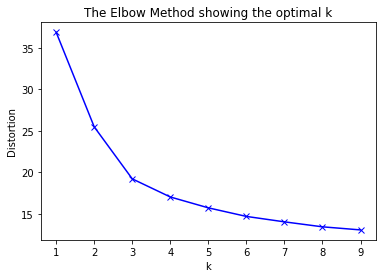

In [20]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
# Define number of clusters
noOfClusters = 5

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(df_select)



#Kmean.cluster_centers_
centers = model.cluster_centers_

In [22]:
centers.shape

(5, 5)

In [23]:
centers

array([[68.28133216, 66.72042068, 37.74758983, 46.39789658, 10.75460123],
       [66.60172414, 14.11896552, 13.67931034, 20.28103448, 67.41551724],
       [62.5630452 , 41.41157811, 67.17446471, 66.62490087, 10.60507534],
       [65.71541219, 55.93405018, 22.25519713, 26.7390681 , 10.77491039],
       [70.05698272, 67.24100887, 67.82391406, 69.8510042 , 10.64549276]])

In [24]:
# Understanding the clusters
df_cluster = pd.DataFrame(centers, columns= select5features)
df_cluster.index.name = 'cluster'
df_cluster

,reactions,crossing,marking,interceptions,gk_handling
cluster,,,,,
0,68.281332,66.720421,37.747590,46.397897,10.754601
1,66.601724,14.118966,13.679310,20.281034,67.415517
2,62.563045,41.411578,67.174465,66.624901,10.605075
3,65.715412,55.934050,22.255197,26.739068,10.774910
4,70.056983,67.241009,67.823914,69.851004,10.645493


In [25]:
# Number of players in each cluster
pd.value_counts(model.labels_, sort=False)

0    1138
4    2140
1     580
2    1261
3    1399
dtype: int64

In [26]:
model.labels_

array([2, 4, 0, ..., 3, 3, 4])

In [27]:
# Including Prediction column to the initial Dataframe
df['prediction']= model.labels_

In [28]:
df.head()

,player_name,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,prediction
2,Aaron Appindangoye,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2
12,Aaron Cresswell,13,189615,155782,2015-09-21 00:00:00,73.0,77.0,left,medium,medium,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,4
40,Aaron Doran,41,186170,162549,2015-09-21 00:00:00,66.0,70.0,right,medium,medium,...,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0,0
67,Aaron Galindo,68,140161,30572,2015-09-21 00:00:00,69.0,69.0,right,medium,medium,...,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0,2
88,Aaron Hughes,89,17725,23780,2015-09-21 00:00:00,70.0,70.0,right,medium,medium,...,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0,2


In [29]:
# Show features and predicted cluster for some players
player_names = ["Cristiano Ronaldo", "Sergio Ramos", "Gianluigi Buffon", "Miranda", "Luis Suarez"]

df.loc[df.player_name.isin(player_names)].transpose()

,33332,63847,105984,127009,161329
player_name,Cristiano Ronaldo,Gianluigi Buffon,Luis Suarez,Miranda,Sergio Ramos
id,33333,63848,105985,127010,161330
player_fifa_api_id,20801,1179,176580,168609,155862
player_api_id,30893,30717,40636,19327,30962
date,2015-09-21 00:00:00,2015-09-21 00:00:00,2015-09-21 00:00:00,2015-09-21 00:00:00,2015-09-21 00:00:00
overall_rating,93,84,90,84,87
potential,93,84,90,84,87
preferred_foot,right,right,right,right,right
attacking_work_rate,high,medium,high,medium,high
defensive_work_rate,low,medium,medium,medium,medium


In [30]:
# Use this command to select the top 5 players sorted by overall_rating from a specific cluster
prediction_cluster = 4
df.loc[df.prediction==prediction_cluster].sort_values(by=['overall_rating'], ascending=False).head().transpose()

,169805,12774,64467,27333,106199
player_name,Thiago Silva,Andres Iniesta,Giorgio Chiellini,Cesc Fabregas,Luka Modric
id,169806,12775,64468,27334,106200
player_fifa_api_id,164240,41,138956,162895,177003
player_api_id,80562,30955,41884,30613,31097
date,2015-09-21 00:00:00,2015-09-21 00:00:00,2015-09-21 00:00:00,2015-09-21 00:00:00,2015-09-21 00:00:00
overall_rating,88,88,87,87,87
potential,88,88,87,87,87
preferred_foot,right,right,left,right,right
attacking_work_rate,high,high,low,high,high
defensive_work_rate,high,medium,high,medium,medium
